<a href="https://www.kaggle.com/code/kamalapousajja/cause-of-deaths-analysis?scriptVersionId=167877024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> **Cause of Deaths Analysis**

The dataset contains cause of deaths information around the world from 1990 to 2019.

Key finding topics in this analysis:

* Top 10 Countries with the highest number of deaths 
* Top 10 Countries with the lowest number of deaths 
* Time series of total number of deaths around the world 
* Time series compare the total number of deaths between top 10 countries

New Zealand analysis

* Time series of total number of deaths in New Zealand 
* Top 5 cause of deaths in New Zealand
* Time series of top 5 cause of deaths in New Zealand 
* Cause of deaths in New Zealand in 2019
* Top 5 cause of deaths in New Zealand in 2019
* Time series of data not related to disease in New Zealand
* Bar chart race of data not related to diseases in New Zealand

> **Import Libraries and Read data**

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Install the package for bar chart racing

!pip install bar-chart-race

import bar_chart_race as bcr

# Ignore any further warnings

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.8 MB/s eta 0:00:00


In [2]:
# Read the Data

df = pd.read_csv('/kaggle/input/cause-of-deaths-around-the-world/cause_of_deaths.csv')

df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [3]:
# Get the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [4]:
# Get the statistical summary of the numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6120.0,2004.500000,8.656149,1990.0,1997.00,2004.5,2012.00,2019.0
Meningitis,6120.0,1719.701307,6672.006930,0.0,15.00,109.0,847.25,98358.0
Alzheimer's Disease and Other Dementias,6120.0,4864.189379,18220.659072,0.0,90.00,666.5,2456.25,320715.0
Parkinson's Disease,6120.0,1173.169118,4616.156238,0.0,27.00,164.0,609.25,76990.0
Nutritional Deficiencies,6120.0,2253.600000,10483.633601,0.0,9.00,119.0,1167.25,268223.0
Malaria,6120.0,4140.960131,18427.753137,0.0,0.00,0.0,393.00,280604.0
Drowning,6120.0,1683.333170,8877.018366,0.0,34.00,177.0,698.00,153773.0
Interpersonal Violence,6120.0,2083.797222,6917.006075,0.0,40.00,265.0,877.00,69640.0
Maternal Disorders,6120.0,1262.589216,6057.973183,0.0,5.00,54.0,734.00,107929.0
HIV/AIDS,6120.0,5941.898529,21011.962487,0.0,11.00,136.0,1879.00,305491.0


In [5]:
# Get the Statistical summary of the category columns

df.describe(include='object').T

,count,unique,top,freq
Country/Territory,6120,204,Afghanistan,30
Code,6120,204,AFG,30


In [6]:
# Check for number of unique records present in the data

df.nunique(axis = 0)

Country/Territory                              204
Code                                           204
Year                                            30
Meningitis                                    2020
Alzheimer's Disease and Other Dementias       3037
Parkinson's Disease                           1817
Nutritional Deficiencies                      2147
Malaria                                       1723
Drowning                                      1875
Interpersonal Violence                        2142
Maternal Disorders                            1818
HIV/AIDS                                      2412
Drug Use Disorders                             876
Tuberculosis                                  2843
Cardiovascular Diseases                       5225
Lower Respiratory Infections                  4106
Neonatal Disorders                            3553
Alcohol Use Disorders                         1287
Self-harm                                     2758
Exposure to Forces of Nature   

In [7]:
# Check for the missing values

df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [8]:
# Check for duplicate data

df.duplicated().sum()

0

In [9]:
# Rename column

df = df.rename(columns = {'Country/Territory':'Country'})

df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


> **Exploratory Data Analysis**

> **Top 10 cause of deaths**

In [10]:
# Select the columns that are the cause of deaths

cause_of_deaths = [col for col in df.columns if col not in ('Country', 'Code', 'Year')]

cause_of_deaths

['Meningitis',
 "Alzheimer's Disease and Other Dementias",
 "Parkinson's Disease",
 'Nutritional Deficiencies',
 'Malaria',
 'Drowning',
 'Interpersonal Violence',
 'Maternal Disorders',
 'HIV/AIDS',
 'Drug Use Disorders',
 'Tuberculosis',
 'Cardiovascular Diseases',
 'Lower Respiratory Infections',
 'Neonatal Disorders',
 'Alcohol Use Disorders',
 'Self-harm',
 'Exposure to Forces of Nature',
 'Diarrheal Diseases',
 'Environmental Heat and Cold Exposure',
 'Neoplasms',
 'Conflict and Terrorism',
 'Diabetes Mellitus',
 'Chronic Kidney Disease',
 'Poisonings',
 'Protein-Energy Malnutrition',
 'Road Injuries',
 'Chronic Respiratory Diseases',
 'Cirrhosis and Other Chronic Liver Diseases',
 'Digestive Diseases',
 'Fire, Heat, and Hot Substances',
 'Acute Hepatitis']

In [11]:
# Create a new column 'Total_deaths' (Sum all cause of deaths)

df['Total_deaths'] = df[cause_of_deaths].sum(axis=1)

df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


In [12]:
# Find the total number of each disease 

disease_df = df[cause_of_deaths].sum().to_frame().reset_index()

disease_df.rename(columns = {'index': 'Diseases', 0:'Total_deaths'}, inplace = True)

disease_df

,Diseases,Total_deaths
0,Meningitis,10524572
1,Alzheimer's Disease and Other Dementias,29768839
2,Parkinson's Disease,7179795
3,Nutritional Deficiencies,13792032
4,Malaria,25342676
5,Drowning,10301999
6,Interpersonal Violence,12752839
7,Maternal Disorders,7727046
8,HIV/AIDS,36364419
9,Drug Use Disorders,2656121


In [13]:
# Find the top 10 cause of deaths

Top10_diseases = disease_df.sort_values(by='Total_deaths',ascending = False).head(10)

Top10_diseases

,Diseases,Total_deaths
11,Cardiovascular Diseases,447741982
19,Neoplasms,229758538
26,Chronic Respiratory Diseases,104605334
12,Lower Respiratory Infections,83770038
13,Neonatal Disorders,76860729
17,Diarrheal Diseases,66235508
28,Digestive Diseases,65638635
10,Tuberculosis,45850603
27,Cirrhosis and Other Chronic Liver Diseases,37479321
8,HIV/AIDS,36364419


Text(0.5, 1.0, 'Top 10 cause of deaths around the world during 1990-2019')

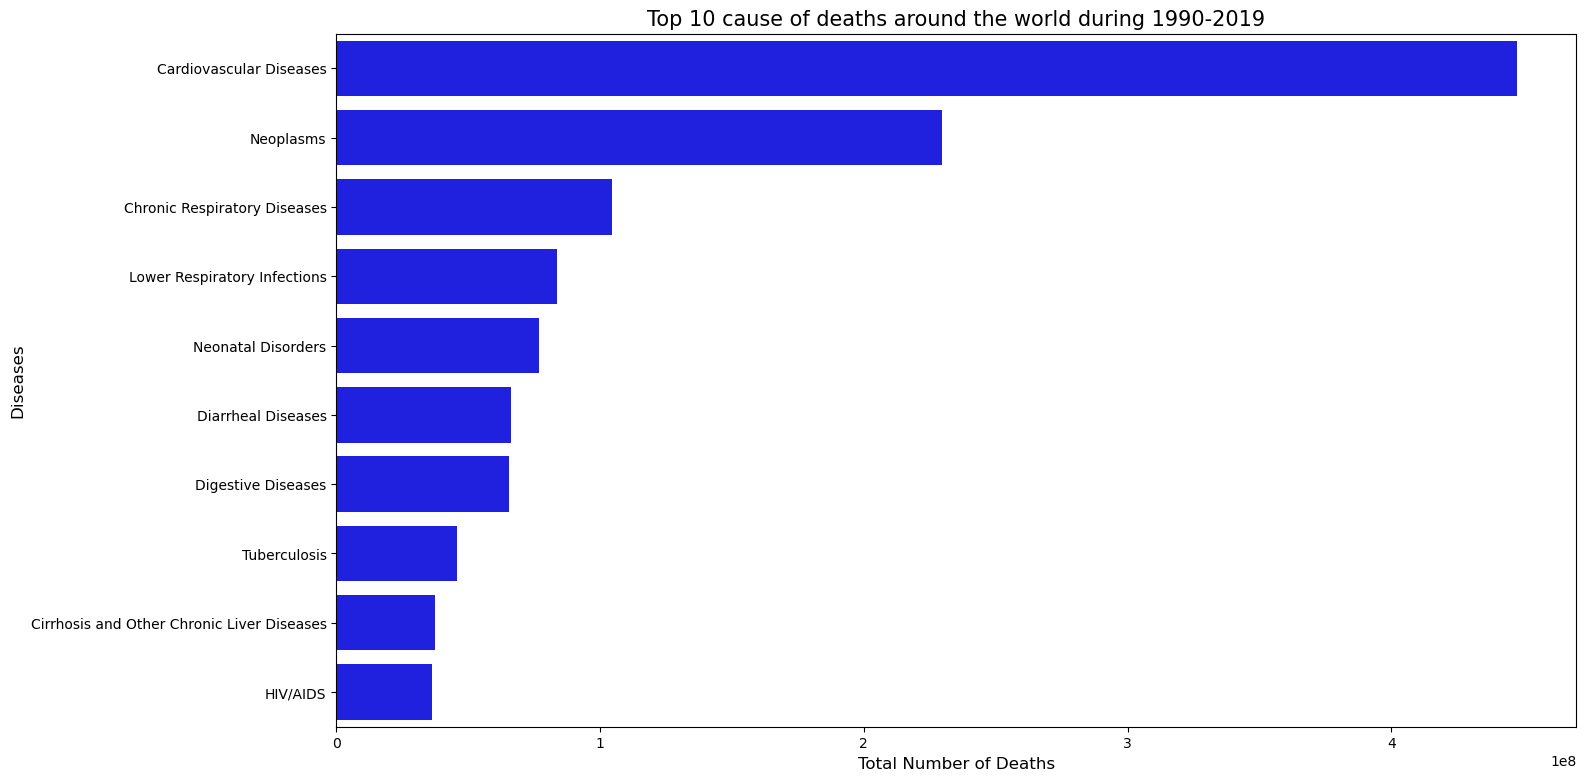

In [14]:
# Create a bar chart of Top 10 cause of deaths

plt.figure(figsize=(16,9))

sns.barplot(data = Top10_diseases, x = 'Total_deaths', y = 'Diseases', color = 'Blue')

# Add some text for labels, title 
plt.xlabel('Total Number of Deaths', fontsize = 12)
plt.ylabel('Diseases', fontsize = 12)
plt.title('Top 10 cause of deaths around the world during 1990-2019', fontsize =15)

In [15]:
# Create a Treemap 

fig = px.treemap(disease_df, 
                 path = [px.Constant('Total_deaths'), 'Diseases'], 
                 values = 'Total_deaths'
                 )

# Add some text for labels, title 
fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of cause of deaths around the world during 1990-2019', title_x=0.5, font_size=15)
fig.show()

> **Total Number of Deaths Around the World**

In [16]:
# Find the total number of deaths group by country

country_df = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=False).reset_index()

country_df

,Country,Total_deaths
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
...,...,...
199,Cook Islands,3999
200,Tuvalu,2962
201,Nauru,2249
202,Niue,591


In [17]:
# Find the Top 10 total number of deaths group by country.

Top10_countries = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=False).head(10).reset_index()

Top10_countries

,Country,Total_deaths
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
5,Nigeria,43670014
6,Pakistan,38151878
7,Brazil,32674112
8,Japan,31922807
9,Germany,25559667


Text(0.5, 1.0, 'Top 10 countries with the highest number of deaths')

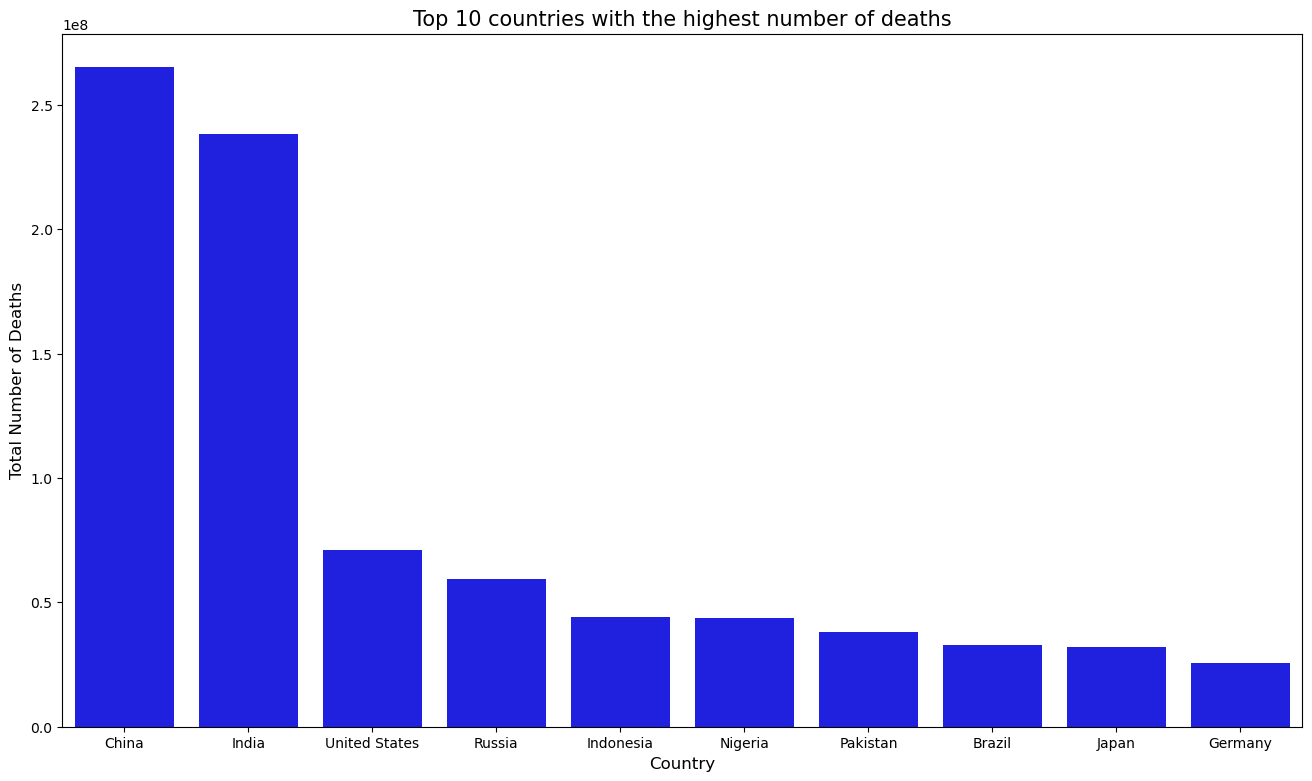

In [18]:
# Create a bar chart of Top 10 countries with the highest number of deaths

plt.figure(figsize = (16,9))

sns.barplot(data = Top10_countries, x = 'Country', y = 'Total_deaths', color = 'Blue')

# Add some text for labels, title 
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Number of Deaths', fontsize = 12)
plt.title('Top 10 countries with the highest number of deaths', fontsize =15)

In [19]:
# Find the Top 10 Countries with the LOWEST number of deaths

Low10_countries = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=True).head(10).reset_index()

Low10_countries

,Country,Total_deaths
0,Tokelau,299
1,Niue,591
2,Nauru,2249
3,Tuvalu,2962
4,Cook Islands,3999
5,Palau,4814
6,San Marino,6761
7,Northern Mariana Islands,7827
8,American Samoa,8619
9,Marshall Islands,10186


Text(0.5, 1.0, 'Top 10 Countries with the lowest number of deaths')

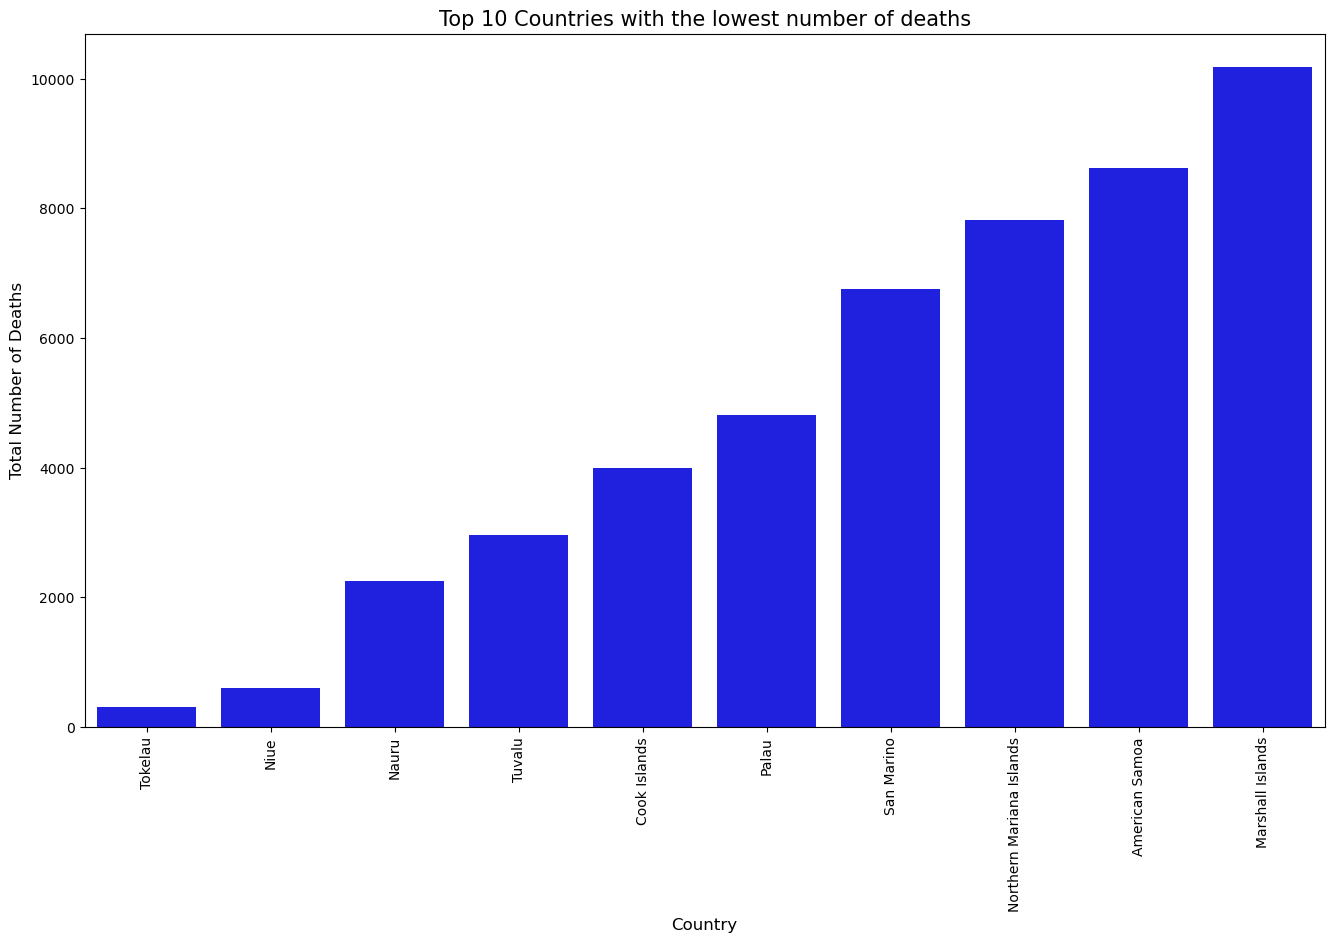

In [20]:
# Create a bar chart of Top 10 countries with the lowest number of deaths

plt.figure(figsize=(16,9))

sns.barplot(data = Low10_countries, x = 'Country', y = 'Total_deaths', color = 'Blue')

# Add some text for labels, title 
plt.xticks(rotation = 90)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Number of Deaths', fontsize = 12)
plt.title('Top 10 Countries with the lowest number of deaths', fontsize =15)

In [21]:
# Create Treemap for the Percentage of Total Number of Deaths group by country

fig = px.treemap(country_df, 
                 path = [px.Constant('Total_deaths'), 'Country'], 
                 values = 'Total_deaths'
                 )

# Add some text for labels, title 
fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of total number of deaths around the world', title_x=0.5, font_size=15)
fig.show()

In [22]:
# Another visualisation by Choropleth Map

fig = px.choropleth(country_df,
                    locations='Country', 
                    locationmode= 'country names', 
                    color= 'Total_deaths', 
                    range_color=[1,10000000], 
                    hover_name='Country')

fig.update_layout(title={'text' : 'Total Number of Deaths around the world during 1990-2019'}, title_x=0.5, font_size=15)
fig.show()

> **Interactive Choropleth Map**

In [23]:
# Create Interactive Choropleth Map

fig = px.choropleth(df,
                    locations='Country',
                    locationmode= 'country names',
                    color='Total_deaths',
                    range_color=[1,2000000], 
                    hover_name='Country', 
                    animation_frame='Year',
                    width=1000
                   )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> **You can change the year or click at the botton to play.**

> **Time series of total number of deaths around the world**

In [24]:
# Find the total number of deaths group by year

Deaths_by_year = df.groupby('Year')['Total_deaths'].sum().reset_index()

Deaths_by_year

,Year,Total_deaths
0,1990,43518516
1,1991,44059729
2,1992,44459130
3,1993,45185713
4,1994,46182613
5,1995,46177018
6,1996,46320827
7,1997,46672370
8,1998,47066088
9,1999,47652090


Text(0.5, 1.0, 'Time series of total number of deaths around the world')

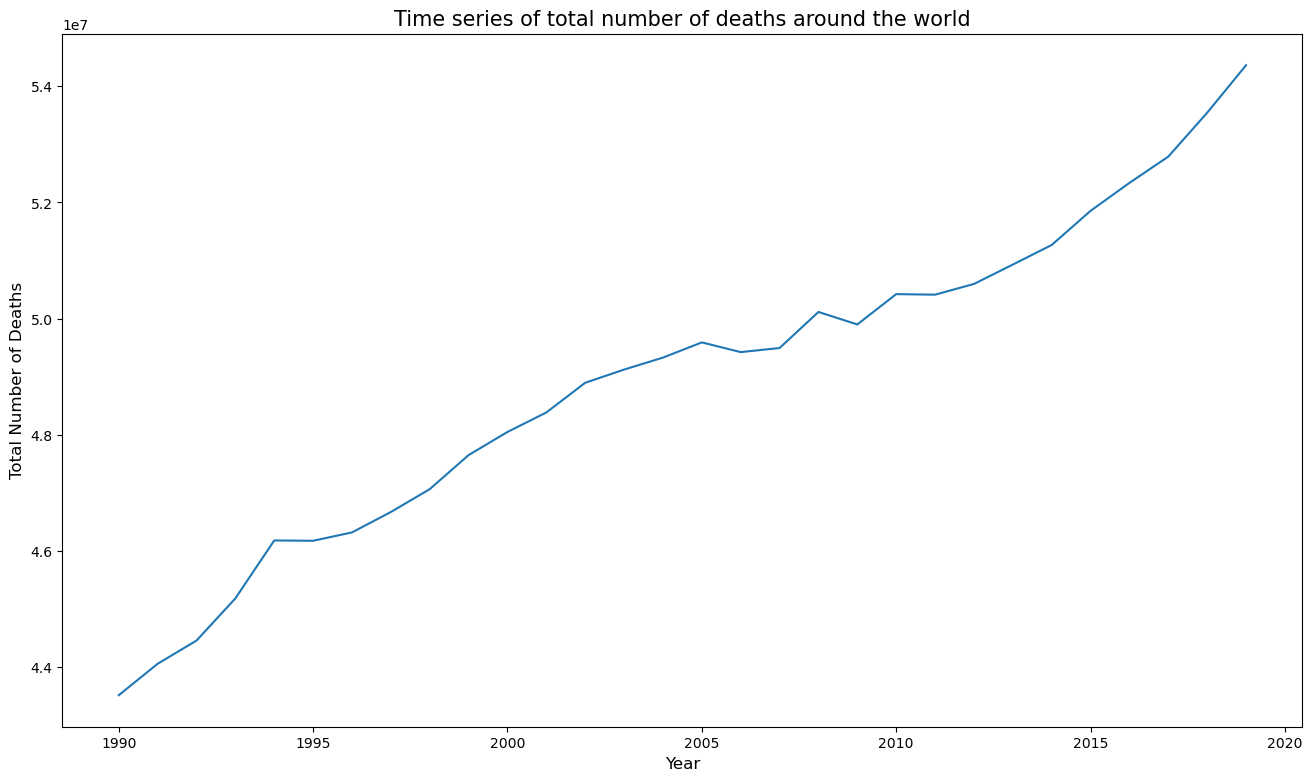

In [25]:
# Create line chart 

plt.figure(figsize=(16,9))

sns.lineplot(data = Deaths_by_year, x = 'Year', y = 'Total_deaths')

plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time series of total number of deaths around the world', fontsize=15)

> **Time series compare the total number of deaths between top 10 countries**

Text(0.5, 1.0, 'Time series compare the total number of deaths between top 10 countries')

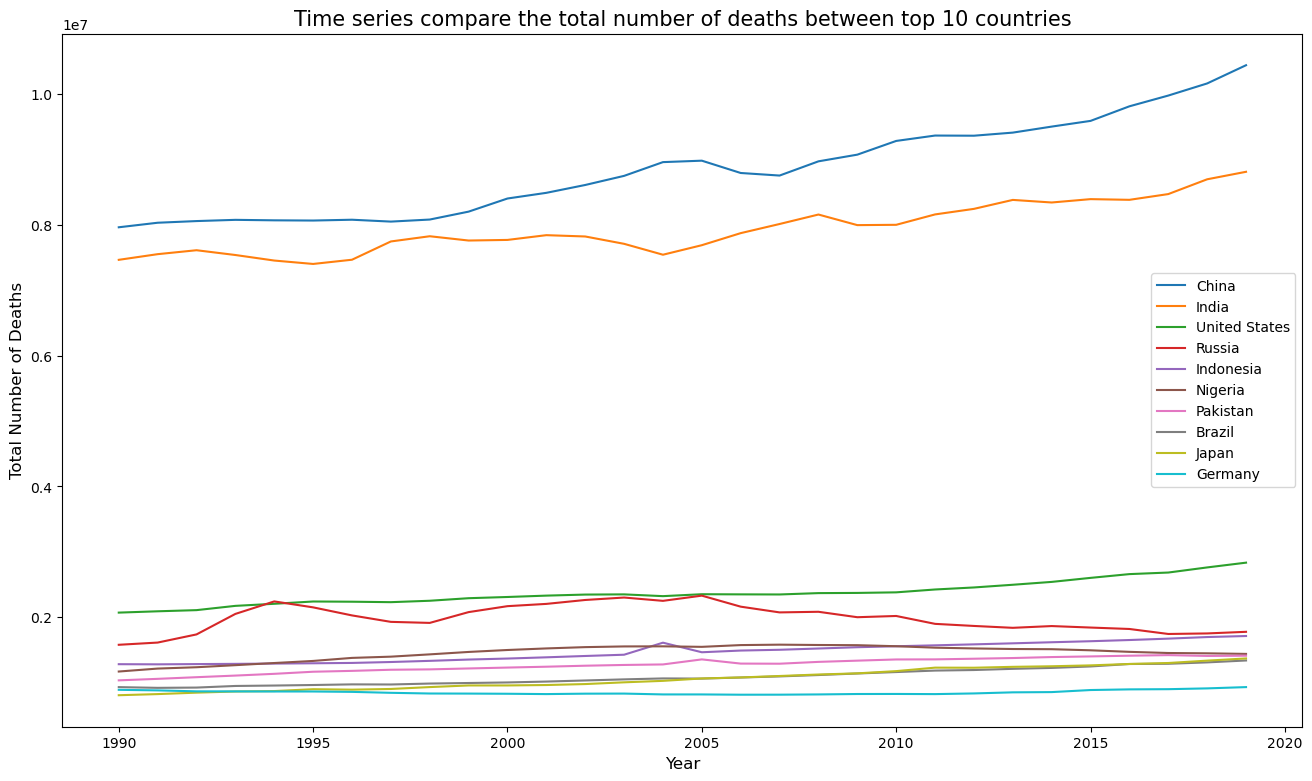

In [26]:
# Create line chart to Compare the Total Number of Deaths Between Top 10 Countries

plt.figure(figsize=(16,9))

for i in Top10_countries.Country:
    a= df[df['Country']==i]
    sns.lineplot(data=a, x='Year', y='Total_deaths',label=i)
    
plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time series compare the total number of deaths between top 10 countries', fontsize=15)

> **New Zealand Analysis**

> **As I live in New Zealand, I will be focusing on analysing data for my country**

In [27]:
# Create a new data frame of New Zealand

New_Zealand_df = df[df['Country'] == 'New Zealand']

New_Zealand_df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3780,New Zealand,NZL,1990,26,770,160,12,0,72,79,...,308,8,7,779,1542,192,750,36,2,25030
3781,New Zealand,NZL,1991,26,807,165,12,0,69,74,...,315,8,7,734,1557,196,754,35,2,25035
3782,New Zealand,NZL,1992,26,844,174,12,0,68,78,...,334,8,7,707,1616,199,764,36,2,25450
3783,New Zealand,NZL,1993,29,883,182,12,0,68,64,...,349,8,8,684,1667,204,770,36,2,25806
3784,New Zealand,NZL,1994,28,919,188,11,0,67,70,...,355,8,7,649,1698,205,767,34,2,25703


> **Top 10 cause of deaths in New Zealand**

In [28]:
# Find the total number of each disease in New Zealand

NZ_disease = New_Zealand_df[cause_of_deaths].sum().to_frame().reset_index()
NZ_disease.rename(columns = {'index': 'Diseases', 0:'Total_deaths'}, inplace = True)
NZ_disease

,Diseases,Total_deaths
0,Meningitis,682
1,Alzheimer's Disease and Other Dementias,40940
2,Parkinson's Disease,8236
3,Nutritional Deficiencies,356
4,Malaria,0
5,Drowning,1788
6,Interpersonal Violence,1934
7,Maternal Disorders,199
8,HIV/AIDS,671
9,Drug Use Disorders,1411


In [29]:
# Find the top 10 cause of deaths in New Zealand

Top10_NZ_diseases = NZ_disease.sort_values(by='Total_deaths',ascending = False).head(10)

Top10_NZ_diseases

,Diseases,Total_deaths
11,Cardiovascular Diseases,328560
19,Neoplasms,247515
26,Chronic Respiratory Diseases,57809
1,Alzheimer's Disease and Other Dementias,40940
28,Digestive Diseases,25560
12,Lower Respiratory Infections,21517
21,Diabetes Mellitus,17532
22,Chronic Kidney Disease,17445
15,Self-harm,15897
25,Road Injuries,14739


Text(0.5, 1.0, 'Top 10 cause of deaths in New Zealand during 1990-2019')

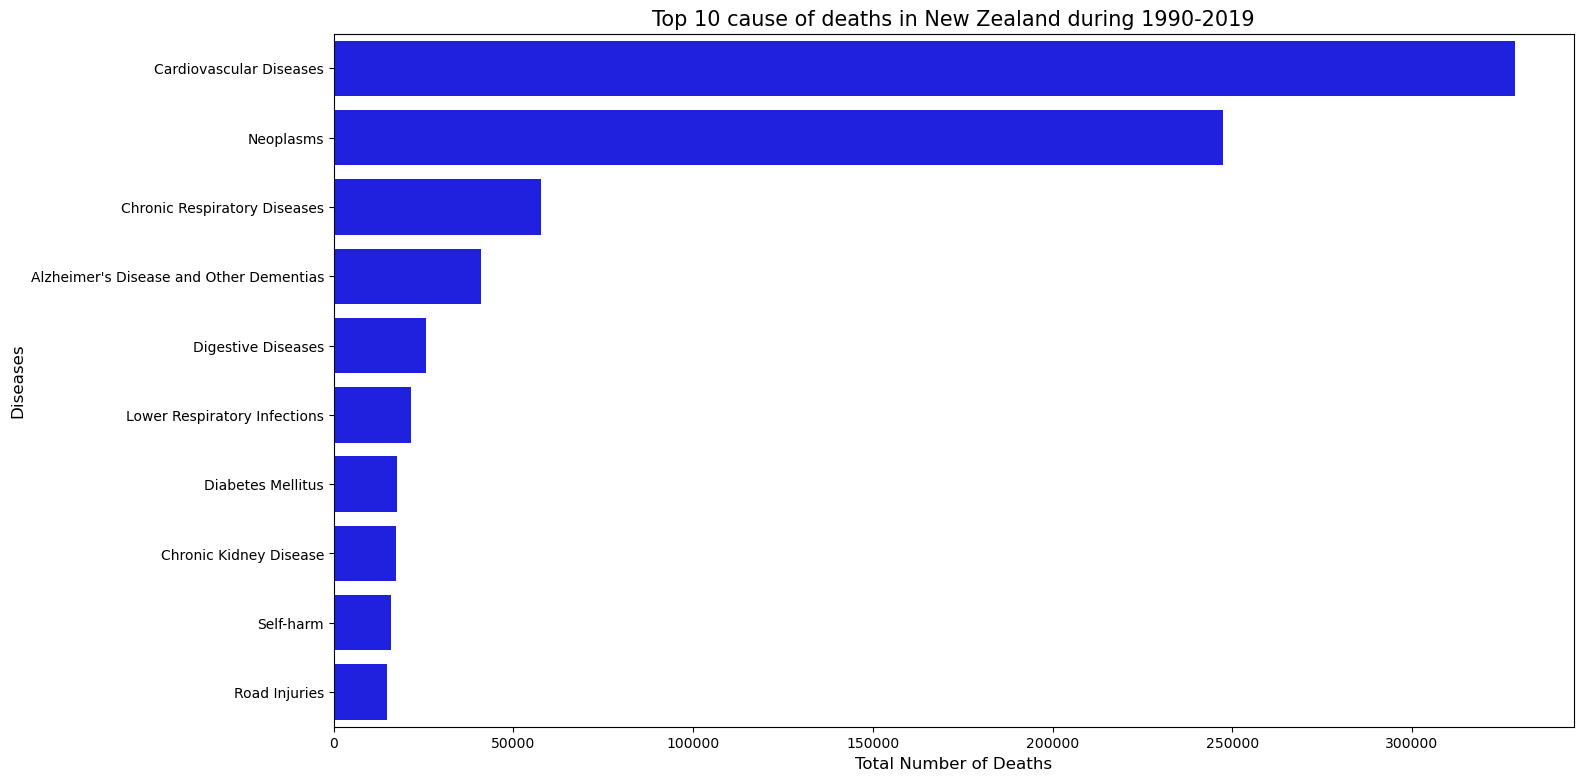

In [30]:
# Create a bar chart of Top 10 cause of deaths in New Zealand

plt.figure(figsize=(16,9))

sns.barplot(data = Top10_NZ_diseases, x = 'Total_deaths', y = 'Diseases', color = 'Blue')

# Add some text for labels, title 
plt.xlabel('Total Number of Deaths', fontsize = 12)
plt.ylabel('Diseases', fontsize = 12)
plt.title('Top 10 cause of deaths in New Zealand during 1990-2019', fontsize =15)

In [31]:
# Create Treemap

fig = px.treemap(NZ_disease, 
                 path = [px.Constant('Total_deaths'), 'Diseases'], 
                 values = 'Total_deaths'
                 )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of cause of deaths in New Zealand during 1990-2019', title_x=0.5, font_size=15)
fig.show()

> **Time Series of total number of deaths in New Zealand**

In [32]:
# Find the total number of deaths in New Zealand group by year

NZ_Deaths_by_year = New_Zealand_df.groupby('Year')['Total_deaths'].sum().reset_index()

NZ_Deaths_by_year

,Year,Total_deaths
0,1990,25030
1,1991,25035
2,1992,25450
3,1993,25806
4,1994,25703
5,1995,26253
6,1996,26395
7,1997,26215
8,1998,25752
9,1999,26213


Text(0.5, 1.0, 'Time Series of Total Number of Deaths in New Zealand')

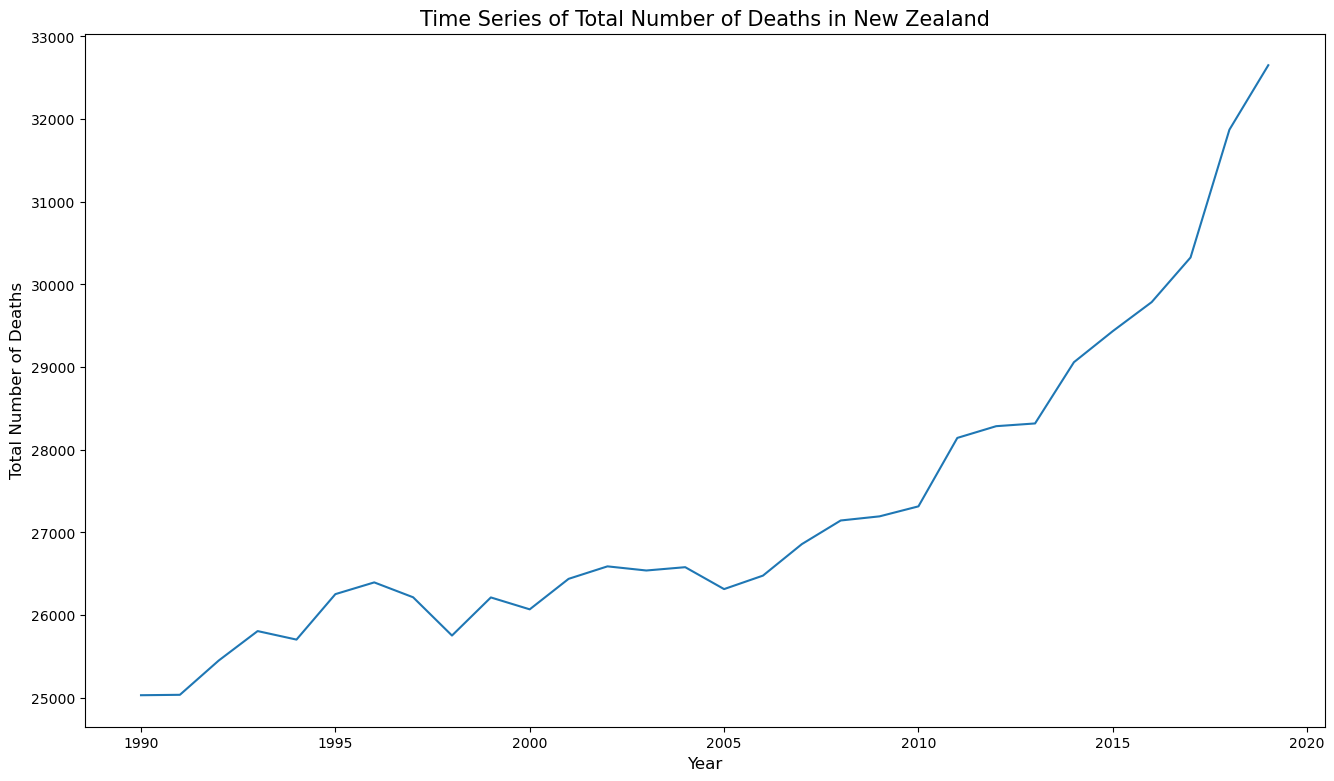

In [33]:
# Create line chart

plt.figure(figsize=(16,9))

sns.lineplot(data = NZ_Deaths_by_year, x='Year', y = 'Total_deaths')

plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Total Number of Deaths in New Zealand', fontsize=15)

> **Time series of Top 5 Cause of Deaths in New Zealand**

Text(0.5, 1.0, 'Time Series of top 5 cause of deaths in New Zealand')

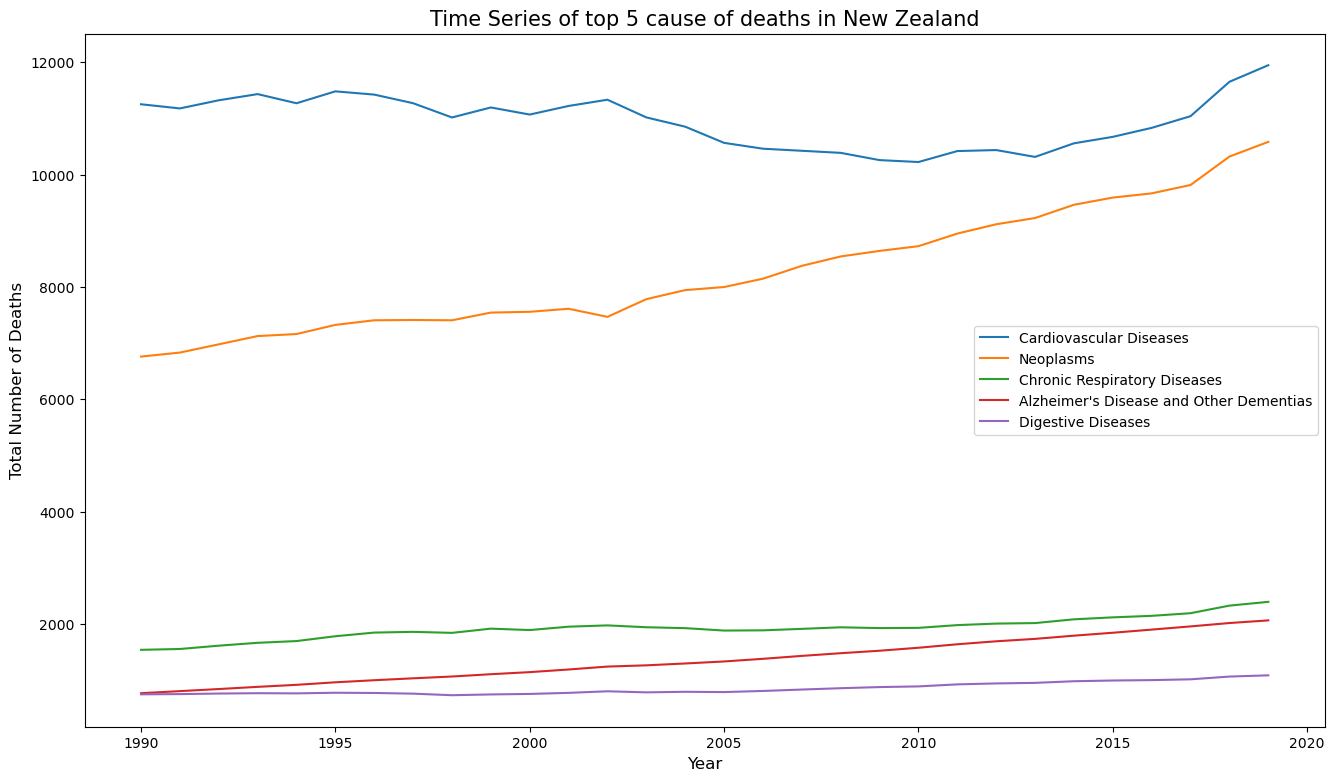

In [34]:
# Create Time series of top 5 cause of deaths in New Zealand

top5_diseases = ["Cardiovascular Diseases", 
                 "Neoplasms", 
                 "Chronic Respiratory Diseases", 
                 "Alzheimer's Disease and Other Dementias", 
                 "Digestive Diseases"]

plt.figure(figsize=(16,9))

for i in top5_diseases:
    sns.lineplot(data = New_Zealand_df, 
                 x = 'Year', 
                 y = New_Zealand_df[i],
                 label = i
                )
    
plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of top 5 cause of deaths in New Zealand', fontsize=15)

> **Cause of Deaths in New Zealand in 2019**

> The latest year from this dataset is 2019. 
> 
> So I would like to know the latest information of cause of deaths in New Zealand.

In [35]:
# Find the lastest year from this dataset

New_Zealand_df.tail()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3805,New Zealand,NZL,2015,12,1846,359,14,0,51,57,...,803,8,11,344,2120,277,996,22,1,29435
3806,New Zealand,NZL,2016,12,1902,362,14,0,50,58,...,816,8,11,345,2147,279,1003,22,1,29786
3807,New Zealand,NZL,2017,13,1959,369,15,0,50,58,...,834,8,12,346,2194,280,1017,22,1,30326
3808,New Zealand,NZL,2018,13,2019,392,15,0,50,58,...,887,8,12,350,2329,293,1066,23,1,31872
3809,New Zealand,NZL,2019,13,2066,403,15,0,50,58,...,915,8,12,352,2396,297,1088,23,1,32652


In [36]:
# Create a new data frame of New Zealand year 2019

NZ_2019 = New_Zealand_df[New_Zealand_df['Year'] == 2019]

NZ_2019

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3809,New Zealand,NZL,2019,13,2066,403,15,0,50,58,...,915,8,12,352,2396,297,1088,23,1,32652


In [37]:
# Find the total number of each disease in New Zealand in 2019

disease_2019 = NZ_2019[cause_of_deaths].sum().to_frame().reset_index()
disease_2019.rename(columns={'index': 'Diseases', 0:'Total_deaths'}, inplace=True)
disease_2019

,Diseases,Total_deaths
0,Meningitis,13
1,Alzheimer's Disease and Other Dementias,2066
2,Parkinson's Disease,403
3,Nutritional Deficiencies,15
4,Malaria,0
5,Drowning,50
6,Interpersonal Violence,58
7,Maternal Disorders,6
8,HIV/AIDS,9
9,Drug Use Disorders,65


> **Top 5 cause of deaths in New Zealand in 2019**

In [38]:
# Find Top 5 cause of deaths in New Zealand in 2019

top5_2019 = disease_2019.groupby('Diseases')['Total_deaths'].sum().sort_values(ascending=False).head(5).reset_index()

top5_2019

,Diseases,Total_deaths
0,Cardiovascular Diseases,11948
1,Neoplasms,10584
2,Chronic Respiratory Diseases,2396
3,Alzheimer's Disease and Other Dementias,2066
4,Digestive Diseases,1088


Text(0.5, 1.0, 'Top 5 Cause of Deaths in New Zealand in 2019')

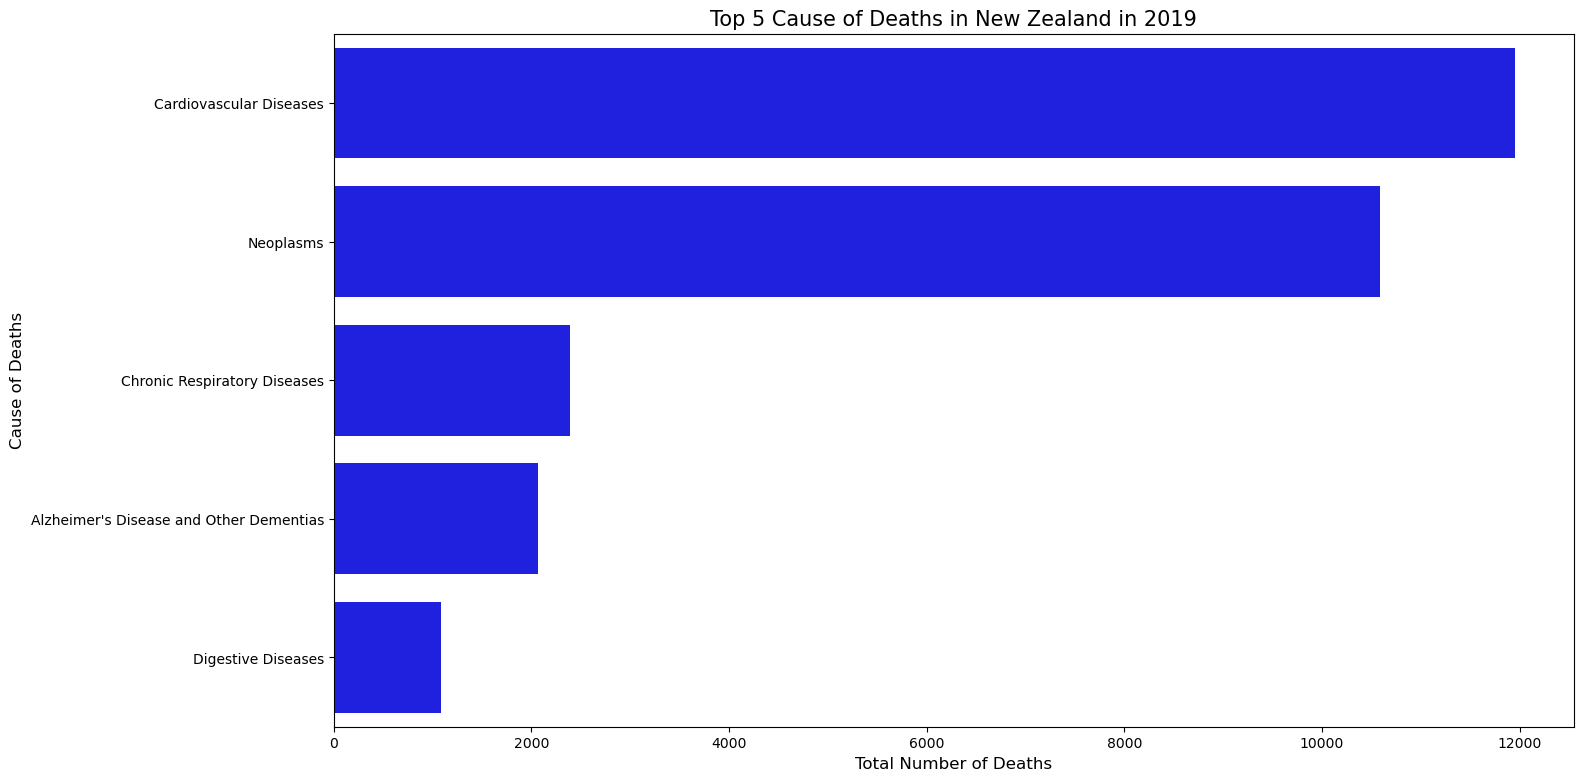

In [39]:
# Create bar chart of Top 5 Cause of Deaths in New Zealand in 2019

plt.figure(figsize=(16,9))

sns.barplot(data = top5_2019, x = 'Total_deaths', y = 'Diseases', color = 'Blue')

plt.xlabel('Total Number of Deaths', fontsize = 12)
plt.ylabel('Cause of Deaths', fontsize = 12)
plt.title('Top 5 Cause of Deaths in New Zealand in 2019', fontsize =15)

In [40]:
# Create Treemap

fig = px.treemap(disease_2019, 
                 path = [px.Constant('Total_deaths'), 'Diseases'], 
                 values = 'Total_deaths'
                 )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths in New Zealand in 2019', title_x=0.5, font_size=15)
fig.show()

> **Time series of data not related to disease in New Zealand**

> I excluded the data of column 'Road Injuries' and 'Self-harm'.
> 
> Because the range of the data will be too high, resulting in the line chart being too wide and hard to read.
> 

Text(0.5, 1.0, 'Time Series of Data Not Related to Disease in New Zealand')

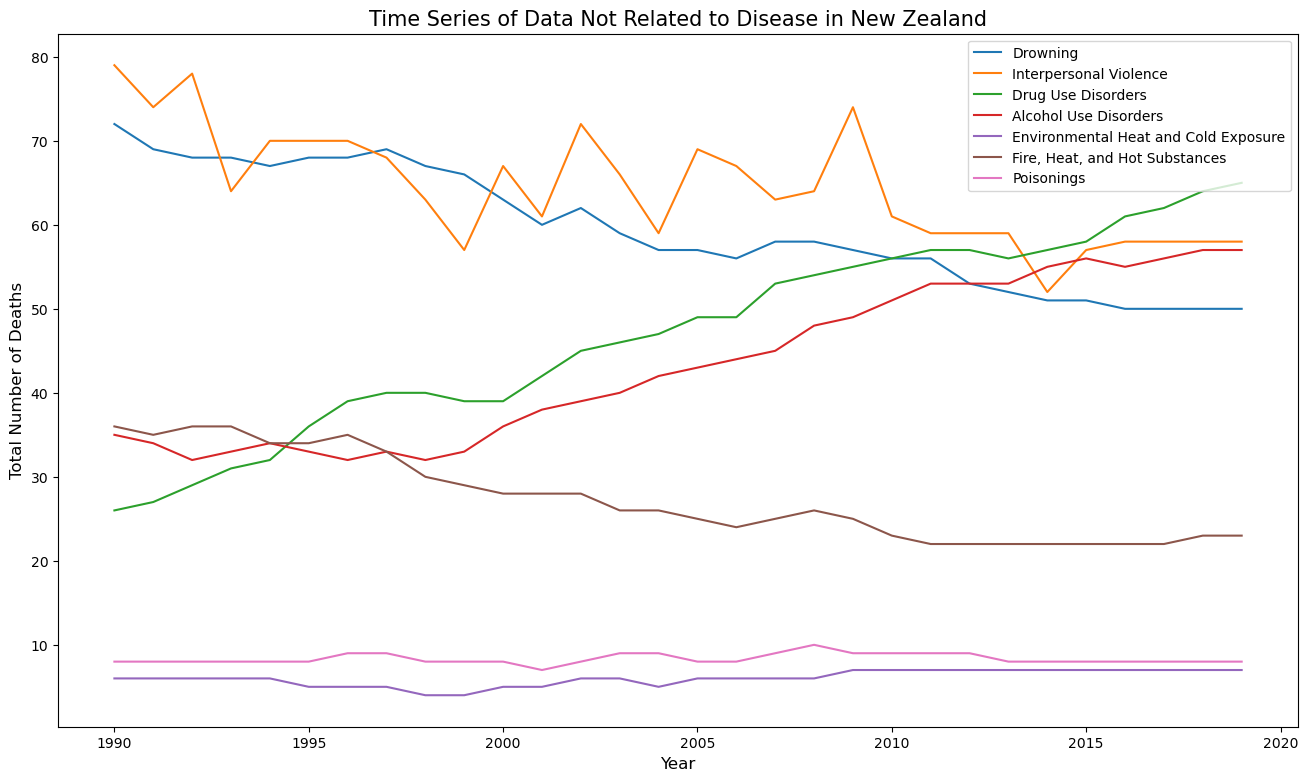

In [41]:
interest_data = ['Drowning', 
                 'Interpersonal Violence', 
                 'Drug Use Disorders',
                 'Alcohol Use Disorders',
                 'Environmental Heat and Cold Exposure', 
                 'Fire, Heat, and Hot Substances',
                 'Poisonings']

plt.figure(figsize=(16,9))

for i in interest_data:
    sns.lineplot(data = New_Zealand_df, 
                 x = 'Year', 
                 y = New_Zealand_df[i],
                 label = i
                )
    
plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Data Not Related to Disease in New Zealand', fontsize=15)

> **Bar Chart Race of data not related to disease in New Zealand**

In [42]:
# Create a new data frame for only interested data columns

NZ_race = New_Zealand_df[interest_data].reset_index(drop=True)

NZ_race.head()

,Drowning,Interpersonal Violence,Drug Use Disorders,Alcohol Use Disorders,Environmental Heat and Cold Exposure,"Fire, Heat, and Hot Substances",Poisonings
0,72,79,26,35,6,36,8
1,69,74,27,34,6,35,8
2,68,78,29,32,6,36,8
3,68,64,31,33,6,36,8
4,67,70,32,34,6,34,8


In [43]:
# Set column 'Year' to be the index

NZ_race = NZ_race.set_index(New_Zealand_df['Year'])
NZ_race

,Drowning,Interpersonal Violence,Drug Use Disorders,Alcohol Use Disorders,Environmental Heat and Cold Exposure,"Fire, Heat, and Hot Substances",Poisonings
Year,,,,,,,
1990,72,79,26,35,6,36,8
1991,69,74,27,34,6,35,8
1992,68,78,29,32,6,36,8
1993,68,64,31,33,6,36,8
1994,67,70,32,34,6,34,8
1995,68,70,36,33,5,34,8
1996,68,70,39,32,5,35,9
1997,69,68,40,33,5,33,9
1998,67,63,40,32,4,30,8


In [44]:
# Create Bar chart race

bcr.bar_chart_race(NZ_race, 
                   n_bars = 7,
                   orientation='h',
                   sort='desc',
                   period_length=1000,
                   fixed_max=True, fixed_order=False,
                   figsize=(4, 3), period_fmt='Year {x:.0f}', 
                   title='Compare Data Not Related to Disease in NZ')

In [45]:
# Export data to csv file

df.to_csv('cause_of_death.csv',index = False)
disease_df.to_csv('disease_df.csv',index = False)
New_Zealand_df.to_csv('New_Zealand_df.csv',index = False)

print('Done')

Done
